In [1]:

import numpy as np
# import pyvista as pv
from skimage.measure import label
import matplotlib.pyplot as plt
import nrrd

In [2]:
file  = "/Volumes/data/3dseg/160_10-layer/predictions/00/model_06-lowres-2024-01-29/subvolumes/160_10-layer_00_predictions_0000-0230_0460-0690.pred.npy"

In [3]:
array = np.load(file)
print(array.shape)
print(np.unique(array))

(200, 230, 230)
[0 1 2]


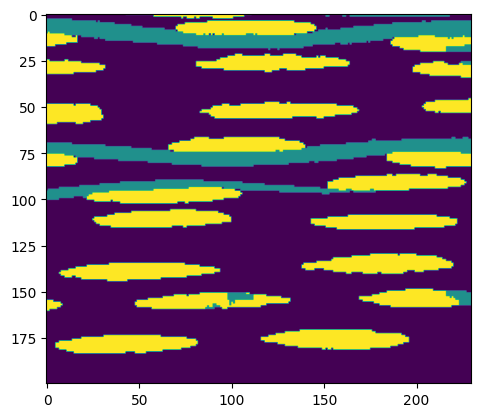

In [4]:
plt.imshow(array[:,115,:])

In [5]:
array_bin = array == 1

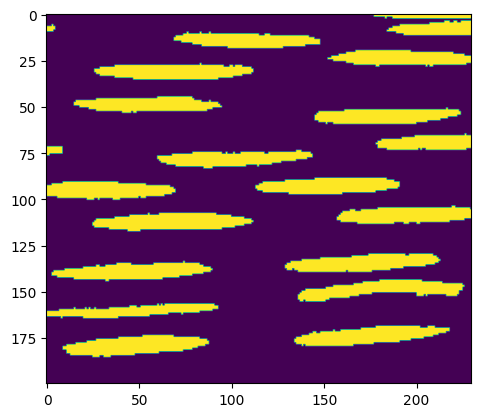

In [6]:
plt.imshow(array_bin[:,:,115])

In [7]:
array_label = label(array_bin)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90], dtype=int32)

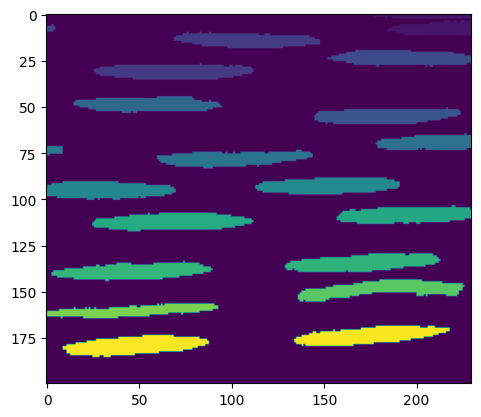

In [8]:
plt.imshow(array_label[:,:,115])
np.unique(array_label)

In [10]:
# Define the file path to save the segmentation file
output_path = "segmentation.nrrd"

# Save the labeled array as a NRRD segmentation file
nrrd.write(output_path, array_label)

print(f"Segmentation saved to: {output_path}")

Segmentation saved to: segmentation.nrrd


In [9]:
# Function to generate meshes for each label
def generate_meshes(labeled_array):
    meshes = []
    for label in np.unique(labeled_array):
        if label == 0:  # Skip background label
            continue
        mask = (labeled_array == label)
        vertices, faces, _, _ = measure.marching_cubes(mask.astype(int))
        meshes.append((vertices, faces))
    return meshes

In [10]:
# Function to save each mesh as an STL file
def save_mesh_as_stl(vertices, faces, filename):
    mesh_data = stl.mesh.Mesh(np.zeros(len(faces), dtype=stl.mesh.Mesh.dtype))
    for i, f in enumerate(faces):
        for j in range(3):
            mesh_data.vectors[i][j] = vertices[f[j], :]
    mesh_data.save(filename)

In [12]:
# Generate meshes
meshes = generate_meshes(array_label)

In [13]:
print(meshes[0])

(array([[ 0. , 71.5, 80. ],
       [ 0. , 72. , 79.5],
       [ 0.5, 72. , 80. ],
       [ 0. , 72. , 80.5],
       [ 0. , 73. , 79.5],
       [ 0.5, 73. , 80. ],
       [ 0.5, 73. , 81. ],
       [ 0. , 72.5, 81. ],
       [ 0. , 73. , 81.5],
       [ 0. , 74. , 79.5],
       [ 0.5, 74. , 80. ],
       [ 0.5, 74. , 81. ],
       [ 0. , 74. , 81.5],
       [ 0. , 75. , 79.5],
       [ 0.5, 75. , 80. ],
       [ 0.5, 75. , 81. ],
       [ 0. , 75. , 81.5],
       [ 0. , 76. , 79.5],
       [ 0.5, 76. , 80. ],
       [ 0.5, 76. , 81. ],
       [ 0. , 76. , 81.5],
       [ 0. , 77. , 79.5],
       [ 0.5, 77. , 80. ],
       [ 0. , 76.5, 81. ],
       [ 0. , 77. , 80.5],
       [ 0. , 77.5, 80. ]], dtype=float32), array([[ 2,  1,  0],
       [ 3,  2,  0],
       [ 5,  4,  2],
       [ 2,  4,  1],
       [ 7,  6,  3],
       [ 6,  2,  3],
       [ 6,  5,  2],
       [ 8,  6,  7],
       [10,  9,  5],
       [ 5,  9,  4],
       [11,  5,  6],
       [10,  5, 11],
       [12, 11,  8],
       

In [14]:
# Save each mesh as an STL file
for i, (vertices, faces) in enumerate(meshes):
    save_mesh_as_stl(vertices, faces, f"mesh_{i}.stl")